# Code

In [2]:
import numpy as np
from numpy import linalg as LA
import seaborn as sns

In [3]:
def normalize(X):
    return (X - X.mean(axis=0))/X.std(axis =0)

In [54]:
def LDA(X:np.ndarray,y:np.ndarray):
    X = normalize(X)
    data = np.hstack((X, y))
    
    n_fetures = X.shape[1]
    classes = np.unique(y) 
    k = len(classes) - 1
    
    Sw = np.zeros((n_fetures, n_fetures))
    Sb = np.zeros((n_fetures, n_fetures))
    
    overall_mean = X.mean(axis = 0)
    for c in classes:
        Xc = np.delete(data[data[:, -1] == c], -1, 1)
        Nc = Xc.shape[0]
        Xc_mean = Xc.mean(axis = 0).reshape((-1, 1))
        Xc_center = Xc - Xc_mean.T
        Sw += (Xc_center.T @ Xc_center)
        
        Xc_far = (Xc_mean - overall_mean)
        Sb += Nc * (Xc_far.T @ Xc_far)
    values, vectors = LA.eig(LA.inv(Sw) @ Sb)
    W = np.zeros((k, X.shape[-1]))
    for i in range(k):
        max_arg = np.argmax(values)
        W[i] = vectors[max_arg]
        np.delete(values, max_arg)
        np.delete(vectors, max_arg, 0)
    return W
    
    

# Test on iris dataset

In [55]:
iris_row = sns.load_dataset("iris")

In [56]:
X = np.array(iris_row.drop(["species"], axis = 1))
y = np.array(iris_row["species"])
label_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y = np.array([label_map[label] for label in y]).reshape((-1, 1))

In [57]:
W = LDA(X, y)

In [58]:
X_prim =( W @ X.T).T

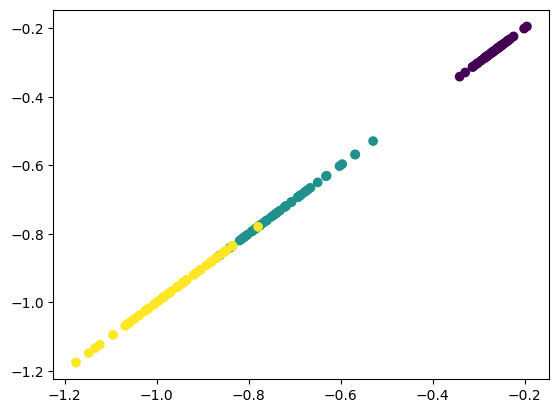

In [60]:
import matplotlib.pyplot as plt

plt.scatter(X_prim[:,0], X_prim[:,1], c= y);